<h1><b> Spatialisation : Interpolation des données du clients </b></h1>

Ce notebook présente l'utilisation en clair d'un filtre variationnel, à l'aide du module ```spotpy``` pour assimiler des données utilisant une méthode variationnelle.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib
matplotlib.style.use("ggplot")
import matplotlib.pyplot as plt
from spatial import Spatial_grid, HumidityData
from scipy.interpolate import griddata

On va chercher à interpoler les données du client entre différents points. Plusieurs méthodes sont possibles: on peut imaginer faire une interpolation simple entre les points. C'est l'objectif du bloc de code si dessous: il présente une implémentation avec des données au hasard, stockée dans ```x_i``` et ```y_i```.

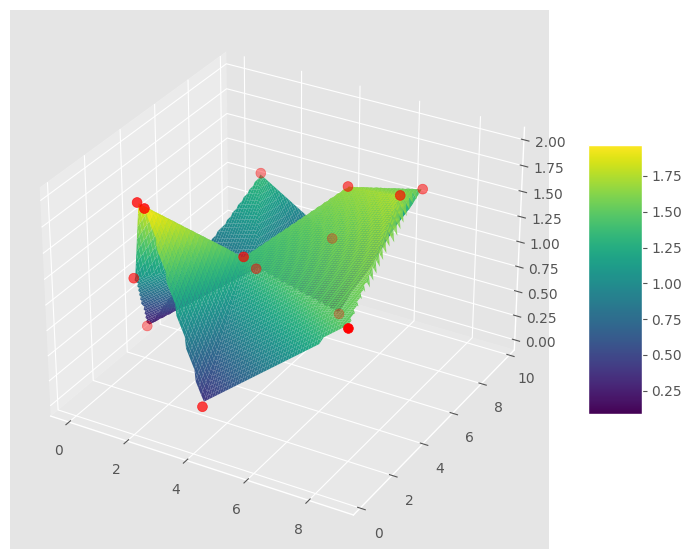

In [2]:
# data
np.random.seed(1)
n = 14
round = 3
x = np.round(np.random.rand(n)*10,round)
y = np.round(np.random.rand(n)*10,round)
z = np.round(np.random.rand(n)*2,round)


# Create a grid of points where we want to interpolate
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the z values over the grid
zi = griddata((x, y), z, (xi, yi), method='linear')

# Create the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xi, yi, zi, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

# Add a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.scatter(x, y, z, color='r', s=50, zorder=10)
plt.show()



<h2>Nearest neighbors</h2>

On peut faire une approximation plus pertinente en utilisant les plus proches voisins: ainsi, on évitera d'avoir des limites infinis loin des données et d'avoir des gradients trop importants. Pour ce faire, on utilise la classe ```Spatial_Grid``` importé du fichier ```spatial.py```. 

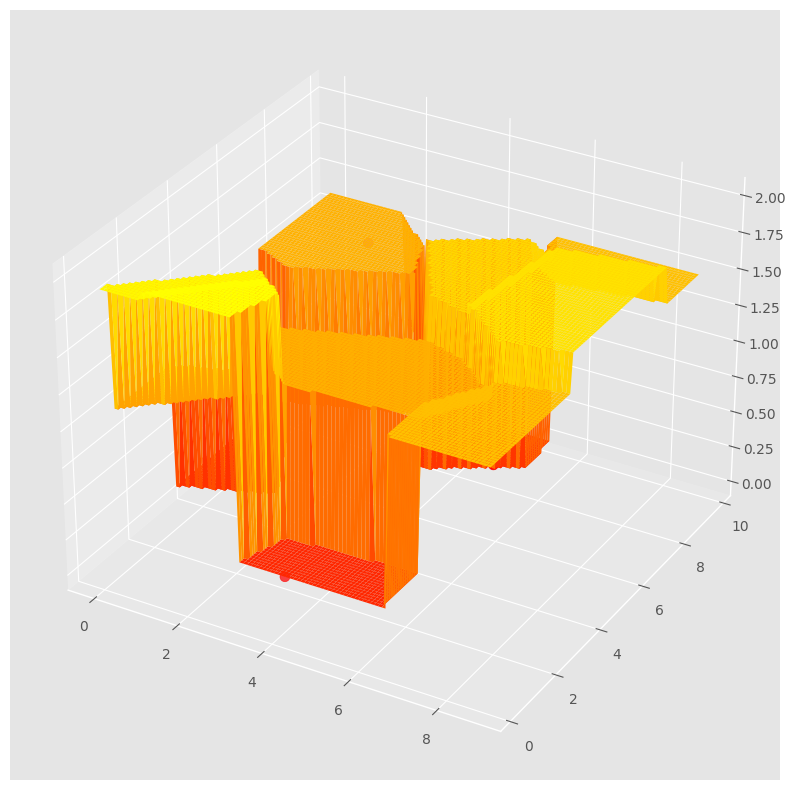

In [3]:
grid = Spatial_grid(x, y, z)
grid.plot(cmap= 'autumn', method='nearest')

<h2>3. Utilisation de spatial plus évoluée</h2>

Afin de combler les manques de l'interpolation mais de permettre d'avoir des résultats plus pertinents entre les points donné par les clients, on peut envisager une interpolation entre les données et une approche des plus proches voisins hors de l'intérieur. 

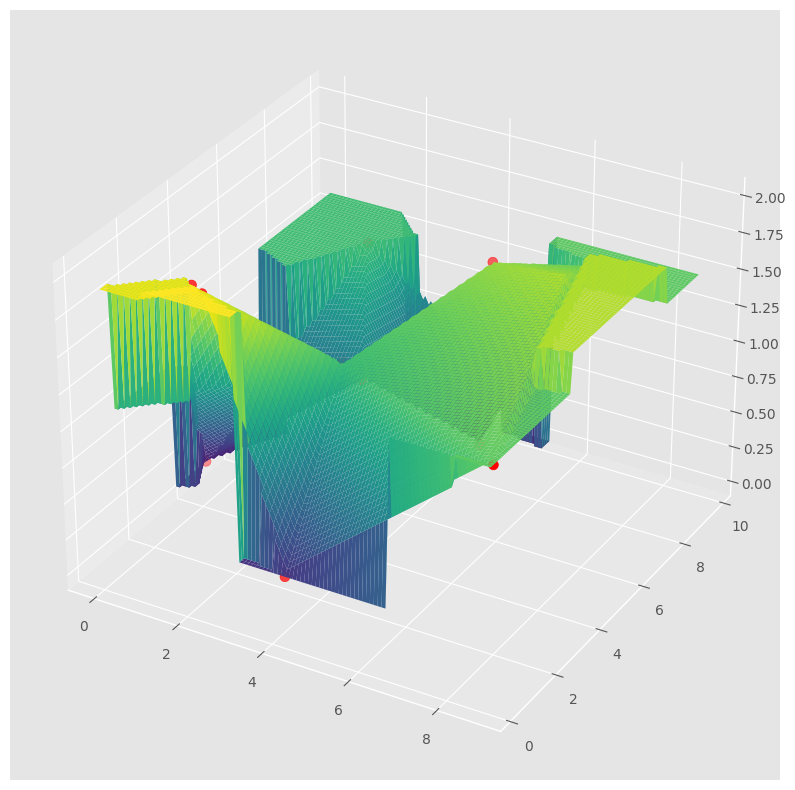

In [4]:
grid2 = Spatial_grid(x, y, z)
grid2.plot_lin_neigh(fig_size=(10, 10), cmap='viridis')

<h2>4. Implémentation des données clients</h2>

Nous allons maintenant appliquer les deux techniques au donées du client. Pour ce faire, il va falloir importer toute les données et s'en servir dans nos grilles.

In [6]:
canons = {}
for element in range(1,6):
    canons[element] = HumidityData('data/Data 2022/Probes/Sonde Canon {}.xlsx'.format(element))
    canons[element].read_data()
    canons[element].get_humidity_values()

In [7]:


coord_x = [coord_canon[i][0] for i in coord_canon.keys()]
coord_y = [coord_canon[i][1] for i in coord_canon.keys()]
k = 200
coord_z = [canons[i].humidity1[k] for i in canons.keys()]


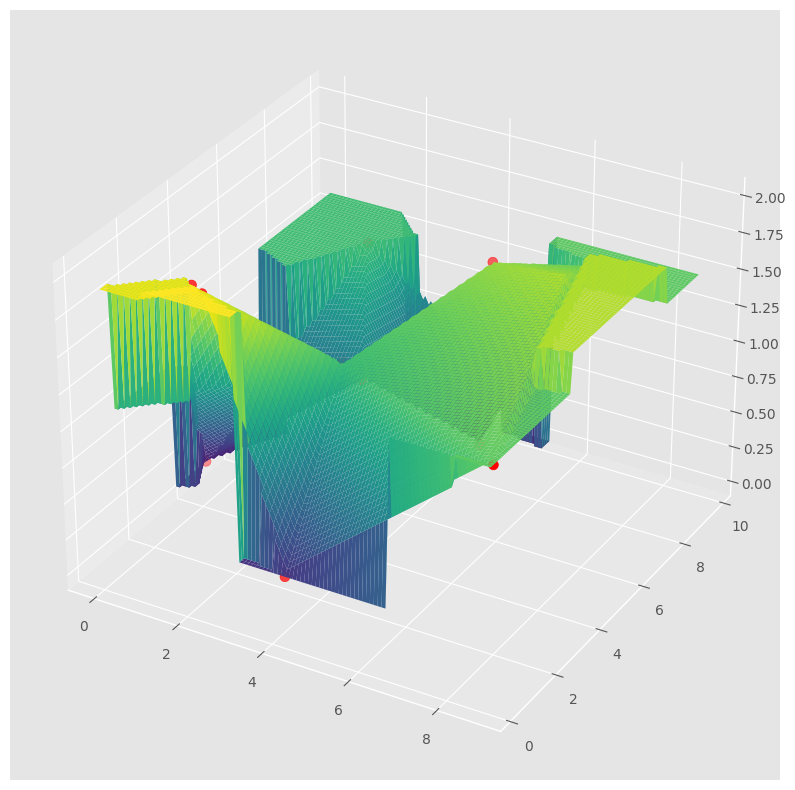

In [8]:
canon_grid = Spatial_grid(coord_x, coord_y, coord_z)
grid2.plot_lin_neigh(fig_size=(10, 10), cmap='viridis')

On obtient donc une vision simplifiée du taux d'humidité du champs, prenant en compte les variations internes mais limitant les dérives au bords du modèle en utilisant l'approche des plus proches voisins hors de l'intérieur des points.